In [1]:
%matplotlib inline

In [2]:
import pathlib

In [3]:
import joblib
import lightgbm as lgb
import pandas as pd

In [4]:
categorical_cols = ["store_id", "item_id"]

In [5]:
root_dir_path = pathlib.Path("..")
data_dir_path = root_dir_path / "data"
processed_dir_path = data_dir_path / "processed"
train_path = processed_dir_path / "train.parquet"
models_dir_path = root_dir_path / "models"
model_path = models_dir_path / "model.joblib"

In [6]:
train = pd.read_parquet(train_path)

In [7]:
train.shape

(58327370, 15)

In [8]:
train[categorical_cols] = train[categorical_cols].astype("category")

In [9]:
is_train = train["date"] <= "2016-01-28"
train, valid = train[is_train], train[~is_train]

In [10]:
train.shape

(55674740, 15)

In [11]:
valid.shape

(2652630, 15)

In [12]:
data = train.select_dtypes(["category", "number"])
data_valid = valid.select_dtypes(["category", "number"])

In [13]:
data.describe(include="all")

,item_id,store_id,demand,wm_yr_wk,snap_CA,snap_TX,snap_WI,sell_price
count,55674740,55674740,5.567474e+07,5.567474e+07,5.567474e+07,5.567474e+07,5.567474e+07,4.337545e+07
unique,3049,10,NaN,NaN,NaN,NaN,NaN,NaN
top,HOUSEHOLD_2_516,WI_3,NaN,NaN,NaN,NaN,NaN,NaN
freq,18260,5567474,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.114015e+00,1.132648e+04,3.285871e-01,3.285871e-01,3.285871e-01,4.403568e+00
std,NaN,NaN,3.882690e+00,1.418930e+02,4.696995e-01,4.696995e-01,4.696995e-01,3.395343e+00
min,NaN,NaN,0.000000e+00,1.110100e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,NaN,NaN,0.000000e+00,1.121400e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.180000e+00
50%,NaN,NaN,0.000000e+00,1.132700e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+00
75%,NaN,NaN,1.000000e+00,1.143900e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.840000e+00


In [14]:
X = data
X_valid = data_valid
y = data.pop("demand")
y_valid = data_valid.pop("demand")

In [15]:
model = lgb.LGBMRegressor(importance_type="gain", random_state=0)

In [16]:
model.fit(X, y, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)])

[1]	valid_0's l2: 12.3408
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 11.4553
[3]	valid_0's l2: 10.7345
[4]	valid_0's l2: 10.1437
[5]	valid_0's l2: 9.65117
[6]	valid_0's l2: 9.22998
[7]	valid_0's l2: 8.93888
[8]	valid_0's l2: 8.65028
[9]	valid_0's l2: 8.42292
[10]	valid_0's l2: 8.25383
[11]	valid_0's l2: 8.10825
[12]	valid_0's l2: 7.95012
[13]	valid_0's l2: 7.83923
[14]	valid_0's l2: 7.75454
[15]	valid_0's l2: 7.6754
[16]	valid_0's l2: 7.60758
[17]	valid_0's l2: 7.53411
[18]	valid_0's l2: 7.47816
[19]	valid_0's l2: 7.42216
[20]	valid_0's l2: 7.3765
[21]	valid_0's l2: 7.34099
[22]	valid_0's l2: 7.2828
[23]	valid_0's l2: 7.24534
[24]	valid_0's l2: 7.21487
[25]	valid_0's l2: 7.17789
[26]	valid_0's l2: 7.16249
[27]	valid_0's l2: 7.13479
[28]	valid_0's l2: 7.11169
[29]	valid_0's l2: 7.09609
[30]	valid_0's l2: 7.07829
[31]	valid_0's l2: 7.04866
[32]	valid_0's l2: 7.02857
[33]	valid_0's l2: 7.01545
[34]	valid_0's l2: 6.99467
[35]	valid_0's l2: 6.96392
[36]	v

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

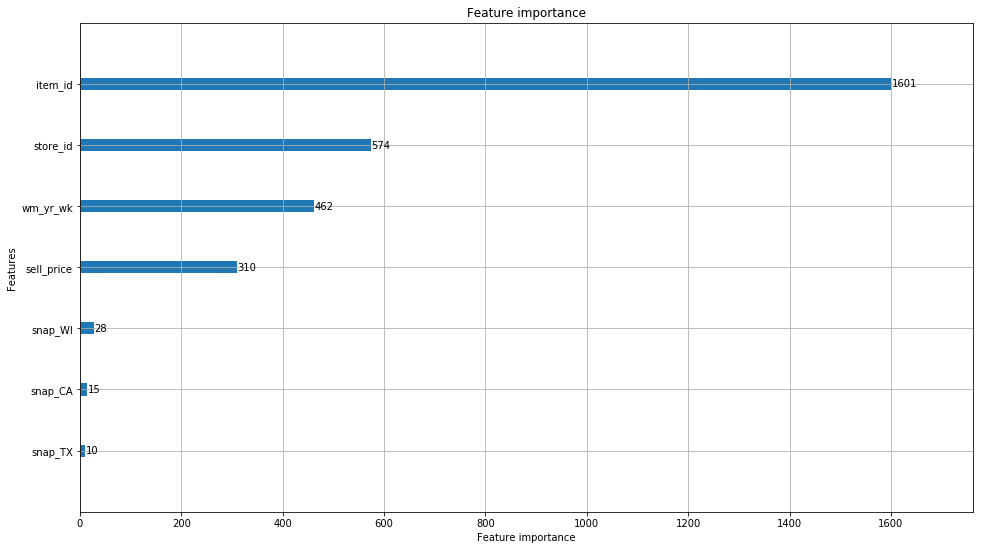

In [17]:
ax = lgb.plot_importance(model, figsize=(16, 9))

In [18]:
joblib.dump(model, model_path)

['..\\models\\model.joblib']